In [30]:
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import boost_histogram as bh
import time

from aare import File, ClusterFinder, VarClusterFinder

base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/')


## Using the ClusterFinder

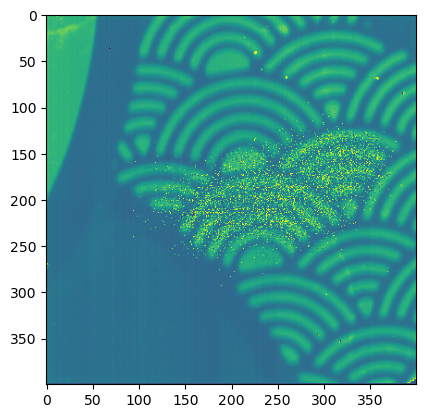

In [59]:
f = File(base/'Moench03new/cu_half_speed_master_4.json')
cf = ClusterFinder((400,400), (3,3))
for i in range(1000):
    cf.push_pedestal_frame(f.read_frame())

fig, ax = plt.subplots()
im = ax.imshow(cf.pedestal())

In [60]:
N = 100
t0 = time.perf_counter()
hist1 = bh.Histogram(bh.axis.Regular(40, -2, 4000))
f.seek(0)
for i in range(N):
    img = f.read_frame()
    clusters = cf.find_clusters_without_threshold(img)
    for c in clusters:
        hist1.fill(np.sum(c))
t1 = time.perf_counter()
print(f'Clustering {N} frames took {t1-t0:.2f}s')

Clustering 100 frames took 2.78s


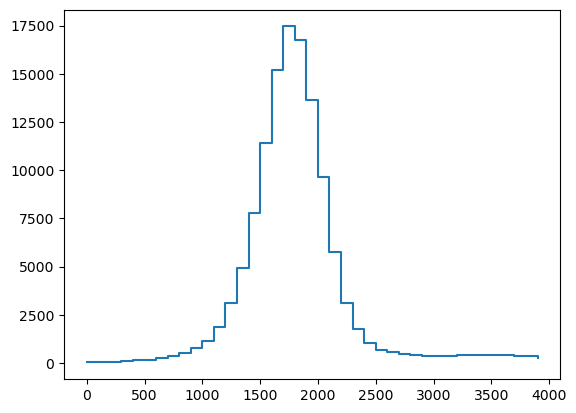

In [61]:
fig, ax = plt.subplots()
ax.step(hist1.axes[0].edges[:-1], hist1.values(), where="post");


## Using variable sized clusters

In [51]:
f.seek(0)
pd = f.read_n(1000).mean(axis = 0)

cf = VarClusterFinder((400,400),50)
f.seek(0)

t0 = time.perf_counter()
hist1 = bh.Histogram(bh.axis.Regular(40, -2, 4000))

for i in range(N):
    img = f.read_frame()-pd
    cf.find_clusters(img)
clusters = cf.steal_hits()
hist1.fill(clusters['energy'])
t1 = time.perf_counter()
print(f'Clustering {N} frames took {t1-t0:.2f}s')

Clustering 100 frames took 2.95s


(0.0, 20000.0)

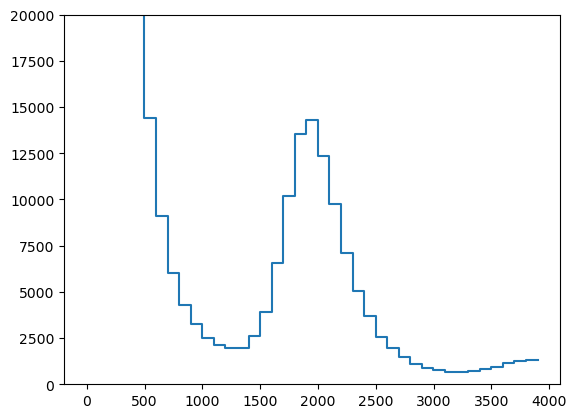

In [56]:
fig, ax = plt.subplots()
ax.step(hist1.axes[0].edges[:-1], hist1.values(), where="post");
ax.set_ylim(0,20000)

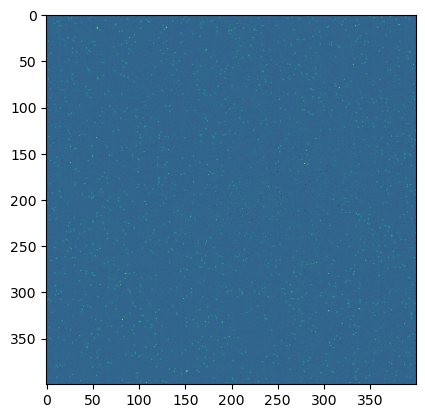

In [57]:
fig, ax = plt.subplots()
im = ax.imshow(f.read_frame()-pd)

In [43]:
pd

array([[ 4407045,  4280134,  4549710, ...,  4260632,  4276378,  4382409],
       [11929055, 11755659, 11668505, ...,  6984625,  7437757,  7423493],
       [11650711, 11508548, 11421663, ...,  6750261,  7185557,  7225040],
       ...,
       [ 7146151,  7129999,  7022862, ...,  4125367,  4169842,  4287009],
       [ 7290320,  7287041,  7141530, ...,  4086501,  4375494,  4282441],
       [ 4173376,  4318288,  4334433, ...,  4214393,  4300476,  4437080]],
      dtype=uint64)